In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bedah_data.csv', sep='|')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10,11,15,16,17,19,23,33,35,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#agar bisa melihat semua data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Cek data

In [4]:
data.head()

,apbdindex,kodesatker,kodepemda,namapemda,tahunanggaran,bulan,tglpengiriman,kodedata,statusdata,jeniscoa,nomorperda,tanggalperda,namaaplikasi,pengembangaplikasi,kegiatanindex,kodeurusanprogram,namaurusanprogram,kodeurusanpelaksana,namaurusanpelaksana,kodeskpd,namaskpd,kodeprogram,namaprogram,kodekegiatan,namakegiatan,kodefungsi,namafungsi,kodeakunutama,namaakunutama,kodeakunkelompok,namaakunkelompok,kodeakunjenis,namaakunjenis,kodeakunobjek,namaakunobjek,kodeakunrincian,namaakunrincian,kodeakunsub,namaakunsub,nilaianggaran
0,66374,990015,1.0,Provinsi Aceh,2019,14,2020-07-21 10:21:23.498,1,4,2,0,NaN,SIPKD,USADI4,91441001,0.01.,PENDIDIKAN,0.01.,PENDIDIKAN,100,DINAS PENDIDIKAN DAYAH ACEH,0.0,Non Program,0,Non Kegiatan,10.0,Pendidikan,5.0,BELANJA,1.0,BELANJA OPERASI,1.0,Belanja Pegawai,1,Belanja Gaji dan Tunjangan,4,Tunjangan Fungsional,,NaN,5880000.0
1,66374,990015,1.0,Provinsi Aceh,2019,14,2020-07-21 10:21:23.498,1,4,2,0,NaN,SIPKD,USADI4,91441001,0.01.,PENDIDIKAN,0.01.,PENDIDIKAN,100,DINAS PENDIDIKAN DAYAH ACEH,0.0,Non Program,0,Non Kegiatan,10.0,Pendidikan,5.0,BELANJA,1.0,BELANJA OPERASI,1.0,Belanja Pegawai,1,Belanja Gaji dan Tunjangan,5,Tunjangan Fungsional Umum,,NaN,80030000.0
2,66374,990015,1.0,Provinsi Aceh,2019,14,2020-07-21 10:21:23.498,1,4,2,0,NaN,SIPKD,USADI4,91441001,0.01.,PENDIDIKAN,0.01.,PENDIDIKAN,100,DINAS PENDIDIKAN DAYAH ACEH,0.0,Non Program,0,Non Kegiatan,10.0,Pendidikan,5.0,BELANJA,1.0,BELANJA OPERASI,1.0,Belanja Pegawai,1,Belanja Gaji dan Tunjangan,8,Pembulatan Gaji,,NaN,36774.0
3,66374,990015,1.0,Provinsi Aceh,2019,14,2020-07-21 10:21:23.498,1,4,2,0,NaN,SIPKD,USADI4,91441001,0.01.,PENDIDIKAN,0.01.,PENDIDIKAN,100,DINAS PENDIDIKAN DAYAH ACEH,0.0,Non Program,0,Non Kegiatan,10.0,Pendidikan,5.0,BELANJA,1.0,BELANJA OPERASI,1.0,Belanja Pegawai,1,Belanja Gaji dan Tunjangan,3,Tunjangan Jabatan,,NaN,240635000.0
4,66374,990015,1.0,Provinsi Aceh,2019,14,2020-07-21 10:21:23.498,1,4,2,0,NaN,SIPKD,USADI4,91441001,0.01.,PENDIDIKAN,0.01.,PENDIDIKAN,100,DINAS PENDIDIKAN DAYAH ACEH,0.0,Non Program,0,Non Kegiatan,10.0,Pendidikan,5.0,BELANJA,1.0,BELANJA OPERASI,1.0,Belanja Pegawai,1,Belanja Gaji dan Tunjangan,25,Tunjangan Iuran JKK PNS,,NaN,5594209.0


In [ ]:
data.info() #terdapat 6778267 rows

In [5]:
data['namaakunutama'].unique()

array(['BELANJA', 'PENDAPATAN  LRA', 'TRANSFER', 'PEMBIAYAAN',
       'PENDAPATAN - LRA', 'Pembiayaan', 'BELANJA DAERAH', 'PENDAPATAN',
       'PENDAPATAN DAERAH', 'PEMBIAYAAN DAERAH', 'PENDAPATAN-LRA',
       'Belanja', 'Pendapatan  LRA', 'Transfer', 'Pendapatan', 'transfer',
       'BELANJA TRANSFER', 'BELANJA  LRA', 'TRANSFER  LRA',
       'PENDAPATAN DAERAH  LRA', 'PENDAPATAN   LRA', 'BELANJA - LRA',
       'TRANSFER - LRA', 'PENDAPATAN\xa0-\xa0LRA', 'PENDAPATANLRA'],
      dtype=object)

### Kalo fokus ke belanja

-> sudah dikonfirmasi Secara substansi sama, itu hanya perbedaan nomenklatur di bagan akun standar dari masing2 Pemda, -pak arif
1. mengotomasi pemeriksaan pengajuan belanja apbn, 
2. mendeteksi fraud pengajuan belanja 

In [6]:
data_blj = data[data['namaakunutama']=='BELANJA'] 
#perlu ditambah belanja yg lain

In [7]:
data_blj.shape 

(6250823, 40)

In [8]:
#ambil kolom yang diperlukan
datacl = data[['namapemda', 'kodedata', 'statusdata', 'jeniscoa', 'namaurusanprogram', 'namaurusanpelaksana', 'namaskpd', 'namaprogram', 'namakegiatan', 'namafungsi', 'namaakunkelompok', 'namaakunjenis', 'namaakunobjek', 'namaakunrincian', 'nilaianggaran']]

# DATA CLEANING

In [9]:
#cek data kosong
datacl.isnull().sum()

namapemda                  0
kodedata                   0
statusdata                 0
jeniscoa                   0
namaurusanprogram          0
namaurusanpelaksana        0
namaskpd                   0
namaprogram            65436
namakegiatan           76560
namafungsi              6049
namaakunkelompok           0
namaakunjenis             11
namaakunobjek            440
namaakunrincian        28959
nilaianggaran              0
dtype: int64

In [10]:
#hapus missing values-> sulit menentukan jika ingin mengisi missing values
datacl = datacl.dropna()

# Eksplorasi Data Analisis

In [11]:
datacl['nilaianggaran'].describe() #loh kok ada biaya minus? -> confirmed: buat nyeimbangin akuntansinya, katanya~~

count    6.660209e+06
mean     4.240852e+08
std      1.674798e+10
min     -1.435190e+11
25%      1.651500e+06
50%      6.860000e+06
75%      3.000000e+07
max      1.496154e+13
Name: nilaianggaran, dtype: float64

75% data berada di range -143.519.000.000 ke 30.000.000, sedangkan nilai maksimal 1.496154x10^13

In [12]:
datanoneg = datacl[datacl['nilaianggaran'] > 0] #abaikan aja dulu
datanoneg.head()

,namapemda,kodedata,statusdata,jeniscoa,namaurusanprogram,namaurusanpelaksana,namaskpd,namaprogram,namakegiatan,namafungsi,namaakunkelompok,namaakunjenis,namaakunobjek,namaakunrincian,nilaianggaran
0,Provinsi Aceh,1,4,2,PENDIDIKAN,PENDIDIKAN,DINAS PENDIDIKAN DAYAH ACEH,Non Program,Non Kegiatan,Pendidikan,BELANJA OPERASI,Belanja Pegawai,Belanja Gaji dan Tunjangan,Tunjangan Fungsional,5880000.0
1,Provinsi Aceh,1,4,2,PENDIDIKAN,PENDIDIKAN,DINAS PENDIDIKAN DAYAH ACEH,Non Program,Non Kegiatan,Pendidikan,BELANJA OPERASI,Belanja Pegawai,Belanja Gaji dan Tunjangan,Tunjangan Fungsional Umum,80030000.0
2,Provinsi Aceh,1,4,2,PENDIDIKAN,PENDIDIKAN,DINAS PENDIDIKAN DAYAH ACEH,Non Program,Non Kegiatan,Pendidikan,BELANJA OPERASI,Belanja Pegawai,Belanja Gaji dan Tunjangan,Pembulatan Gaji,36774.0
3,Provinsi Aceh,1,4,2,PENDIDIKAN,PENDIDIKAN,DINAS PENDIDIKAN DAYAH ACEH,Non Program,Non Kegiatan,Pendidikan,BELANJA OPERASI,Belanja Pegawai,Belanja Gaji dan Tunjangan,Tunjangan Jabatan,240635000.0
4,Provinsi Aceh,1,4,2,PENDIDIKAN,PENDIDIKAN,DINAS PENDIDIKAN DAYAH ACEH,Non Program,Non Kegiatan,Pendidikan,BELANJA OPERASI,Belanja Pegawai,Belanja Gaji dan Tunjangan,Tunjangan Iuran JKK PNS,5594209.0


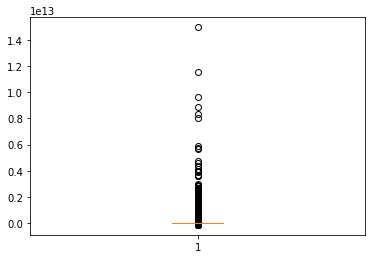

In [13]:
#liat distribusi data nilai anggaran
# Creating plot
plt.boxplot(datacl['nilaianggaran'])
  
# show plot
plt.show() #tambah aneh
#banyak outlier == pake metode non parametrik

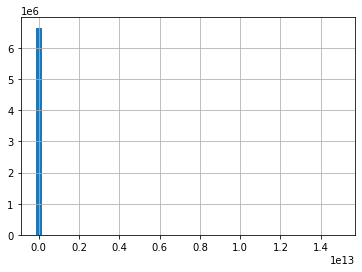

In [15]:
#cek histogram
datacl["nilaianggaran"].hist(bins= 50) 
# data yg berkumpul di<0,01e+13 ada 6,6 juta lebih

In [14]:
datamin = datacl[datacl['nilaianggaran'] < 0] 
datamin.head()

,namapemda,kodedata,statusdata,jeniscoa,namaurusanprogram,namaurusanpelaksana,namaskpd,namaprogram,namakegiatan,namafungsi,namaakunkelompok,namaakunjenis,namaakunobjek,namaakunrincian,nilaianggaran
18570,Kota Padang Sidempuan,1,4,2,Urusan Wajib Pelayanan Dasar Kesehatan,Urusan Wajib Pelayanan Dasar Kesehatan,RUMAH SAKIT UMUM DAERAH,Non Program,Non Kegiatan,Kesehatan,BELANJA OPERASI,Belanja Barang dan Jasa,Belanja Jasa Kantor,Belanja Air,-30000.0
18571,Kota Padang Sidempuan,1,4,2,Urusan Wajib Pelayanan Dasar Kesehatan,Urusan Wajib Pelayanan Dasar Kesehatan,RUMAH SAKIT UMUM DAERAH,Non Program,Non Kegiatan,Kesehatan,BELANJA OPERASI,Belanja Barang dan Jasa,"Belanja Kursus, Pelatihan, Sosialisasi dan Bim...",Belanja Bimbingan Teknis,-1877000.0
35982,Provinsi Lampung,0,4,2,Urusan Pemerintahan Fungsi Penunjang Keuangan,Urusan Pemerintahan Fungsi Penunjang Keuangan,PPKD,Non Program,Non Kegiatan,Pelayanan Umum,PENERIMAAN PEMBIAYAAN,Penggunaan SiLPA,Koreksi SiLPA,Lain-lain,-71184050.0
38585,Kab. Aceh Barat Daya,1,4,2,Urusan Wajib Pelayanan Dasar Kesehatan,Urusan Wajib Pelayanan Dasar Kesehatan,Dinas Kesehatan,Program Standarisasi Pelayanan Kesehatan,Penyusunan standar pelayanan kesehatan,Kesehatan,BELANJA OPERASI,Belanja Pegawai,Belanja Honorarium PNS,Honorarium Panitia Pelaksana Kegiatan,-2900000.0
42022,Kab. Aceh Barat Daya,1,4,2,Urusan Pemerintahan Fungsi Penunjang Keuangan,Urusan Pemerintahan Fungsi Penunjang Keuangan,Badan Keuangan,Non Program,Non Kegiatan,Pelayanan Umum,PENERIMAAN PEMBIAYAAN,Penggunaan SiLPA,Koreksi SiLPA,Lain-lain,-8400000.0


In [15]:
datamin.shape #there's 5694 minus

(5694, 15)

In [16]:
sortmin= datamin.sort_values( by="nilaianggaran",ascending=True) #urutin dari gede ke kecil
sortmin.head()

,namapemda,kodedata,statusdata,jeniscoa,namaurusanprogram,namaurusanpelaksana,namaskpd,namaprogram,namakegiatan,namafungsi,namaakunkelompok,namaakunjenis,namaakunobjek,namaakunrincian,nilaianggaran
6760070,Kab. Lampung Tengah,1,4,2,Urusan Wajib Pelayanan Dasar Pendidikan,Urusan Wajib Pelayanan Dasar Pendidikan,DINAS PENDIDIKAN DAN KEBUDAYAAN,Non Program,Non Kegiatan,Pendidikan,PENDAPATAN ASLI DAERAH PAD LRA,Lainlain PAD Yang Sah LRA,Dana BOS,Dana BOS,-1.435190e+11
3343844,Kab. Lampung Tengah,1,4,2,Urusan Wajib Pelayanan Dasar Pendidikan,Urusan Wajib Pelayanan Dasar Pendidikan,DINAS PENDIDIKAN DAN KEBUDAYAAN,Non Program,Non Kegiatan,Pendidikan,PENDAPATAN ASLI DAERAH (PAD) - LRA,Lain-lain PAD Yang Sah - LRA,Pendapatan dana BOS,Pendapatan dana BOS,-1.282886e+11
4975878,Kota Surabaya,1,4,2,Wajib Otonomi Daerah Pemerintahan Umum Adminis...,Wajib Otonomi Daerah Pemerintahan Umum Adminis...,Badan Pengelolaan Keuangan dan Pajak Daerah,Non Program,Pembiayaan Badan Pengelolaan Keuangan dan Paja...,Otonomi Daerah Pemerintahan Umum Administrasi ...,PENERIMAAN PEMBIAYAAN,Penggunaan SiLPA,Penggunaan SiLPA tahun sebelumnya,Bagi Hasil Pajak,-1.147781e+11
4975880,Kota Surabaya,1,4,2,Wajib Otonomi Daerah Pemerintahan Umum Adminis...,Wajib Otonomi Daerah Pemerintahan Umum Adminis...,Badan Pengelolaan Keuangan dan Pajak Daerah,Non Program,Pembiayaan Badan Pengelolaan Keuangan dan Paja...,Otonomi Daerah Pemerintahan Umum Administrasi ...,PENERIMAAN PEMBIAYAAN,Penggunaan SiLPA,Penggunaan SiLPA tahun sebelumnya,Penerimaan Lainlain Pendapatan Daerah Yang Sah,-1.146775e+11
398788,Kab. Trenggalek,1,4,2,Urusan Pemerintahan Fungsi Penunjang Keuangan,Urusan Pemerintahan Fungsi Penunjang Keuangan,Badan Keuangan Daerah,Non Program,Non Kegiatan,Pelayanan Umum,BELANJA OPERASI,Belanja Barang dan Jasa,Belanja Jasa Kantor,Belanja Telepon LRA,-1.139487e+11


In [17]:
df= sortmin[['namapemda','nilaianggaran']] #ambil 2 variabel

In [21]:
df2 = pd.pivot_table(df, index=['namapemda'],values=['nilaianggaran'],aggfunc='sum') #totalin per pemda

In [23]:
import pandas as pd
df3= df2.nsmallest(10, 'nilaianggaran')
df3 #cek minus terbesar

,nilaianggaran
namapemda,
Kota Surabaya,-4.939111e+11
Kab. Lampung Tengah,-2.721056e+11
Kab. Kerinci,-2.068176e+11
Kab. Trenggalek,-1.685698e+11
Kab. Sidoarjo,-1.672882e+11
Kab. Pangkajene Kepulauan,-1.630154e+11
Kab. Bangka Barat,-1.426334e+11
Kab. Toraja Utara,-1.143260e+11
Kab. Pekalongan,-1.126199e+11


In [24]:
df10= datacl[['namakegiatan','nilaianggaran']]

In [25]:
import pandas as pd
df11= df10.nlargest(10, 'nilaianggaran')
df11 

,namakegiatan,nilaianggaran
3199019,Non Kegiatan,1.496154e+13
1906183,Non Kegiatan,1.152702e+13
1906267,Non Kegiatan,9.649566e+12
3199125,Non Kegiatan,8.893076e+12
13776,Non Kegiatan,8.357472e+12
2517235,Non Kegiatan,8.029792e+12
3997049,Non Kegiatan,5.850230e+12
1906268,Non Kegiatan,5.748676e+12
2818832,Non Kegiatan,5.620854e+12
3199126,Non Kegiatan,4.708906e+12


In [26]:
df12= datacl[['namapemda','namakegiatan','nilaianggaran']]

In [27]:
df12['namakegiatan'] = df12['namakegiatan'].replace(['NON KEGIATAN', 'Non kegiatan', 'NonKegiatan', 'nonkegiatan','nonKegiatan','non kegiatan',
                              'non Kegiatan', 'NON kegiatan', 'NONKEGIATAN', 'nonKEGIATAN', 'NONkegiatan'],'Non Kegiatan')


#singkatannya beda2 direplace

<ipython-input-27-0c431e2aa903>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['namakegiatan'] = df12['namakegiatan'].replace(['NON KEGIATAN', 'Non kegiatan', 'NonKegiatan', 'nonkegiatan','nonKegiatan','non kegiatan',


In [29]:
df13 = pd.pivot_table(df12, index=['namakegiatan'],values=['nilaianggaran'],aggfunc='sum') #ngetotalin by namakegiatan
df13.head()

,nilaianggaran
namakegiatan,
Album Paqbanua Kajian Kesejahteraan Masyarakat Polewali Mandar,1.190902e+08
Jaminan Pelayanan Kesehatan Nasional (JKN) - Non Kapitasi,1.871053e+09
Jaminan Pelayanan Kesehatan Nasional (JKN) -Kapitasi,1.764269e+10
Kegiatan Peningkatan Kompetensi dan profesionalitas Guru dan Tenaga Kependidikan SMK\n,1.504549e+09
PENINGKATAN LAYANAN GURU DAN TENAGA KEPENDIDIKAN SMA\n,1.511885e+11


In [30]:
df13.shape #348376 kegiatan yg berbeda

(348376, 1)

In [31]:
import pandas as pd
df14= df13.nlargest(10, 'nilaianggaran') #kegiatan dg anggaran terbesar
df14

,nilaianggaran
namakegiatan,
Non Kegiatan,1.953047e+15
Pendapatan,7.054215e+13
Belanja Tidak Langsung,4.294952e+13
Pendapatan Badan Pengelolaan Keuangan dan Pajak Daerah,1.513941e+13
Pembangunan jalan,1.110430e+13
Non Program,1.097021e+13
Belanja tidak langsung,8.677459e+12
Pendapatan PPKD,7.881562e+12
Peningkatan Layanan Umum Daerah,4.903574e+12


# Data processing

In [16]:
#buang outlier aja pake < 40 juta
datanoneg = datanoneg[datanoneg['nilaianggaran'] < 25000000]

In [17]:
datanoneg.shape #ada 5 juta row, untuk modelling sepertinya hanya kuat 1 jutaan

(4759374, 15)

In [18]:
datanoneg.describe()
#drop kolom "statusdata" untuk modelling karena sama semua
#biaya paling   minimal 10 ribu?

,kodedata,statusdata,jeniscoa,nilaianggaran
count,4.759374e+06,4759374.0,4.759374e+06,4.759374e+06
mean,8.990176e-01,4.0,1.995106e+00,5.776541e+06
std,3.013054e-01,0.0,6.978369e-02,6.156293e+06
min,0.000000e+00,4.0,1.000000e+00,1.000000e-02
25%,1.000000e+00,4.0,2.000000e+00,1.000000e+06
50%,1.000000e+00,4.0,2.000000e+00,3.300000e+06
75%,1.000000e+00,4.0,2.000000e+00,8.700000e+06
max,1.000000e+00,4.0,2.000000e+00,2.500000e+07


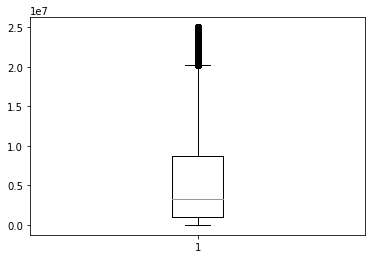

In [19]:
plt.boxplot(datanoneg['nilaianggaran'])
plt.show()

<AxesSubplot:>

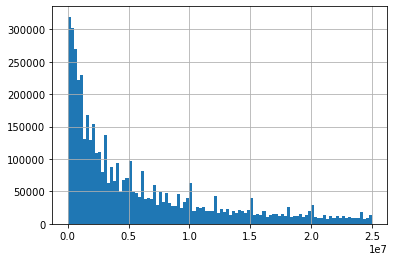

In [20]:
datanoneg["nilaianggaran"].hist(bins= 100)

In [21]:
datafix = datanoneg[['namapemda', 'kodedata', 'jeniscoa', 'namaurusanprogram', 'namaurusanpelaksana', 'namaskpd', 'namaprogram', 'namakegiatan', 'namafungsi', 'namaakunkelompok', 'namaakunjenis', 'namaakunobjek', 'namaakunrincian', 'nilaianggaran']]

In [22]:
datafix = datafix.sample(frac = 0.2) #ambil 20% sample karena spek laptop :(

In [23]:
datafix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951875 entries, 5616564 to 4059328
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   namapemda            951875 non-null  object 
 1   kodedata             951875 non-null  int64  
 2   jeniscoa             951875 non-null  int64  
 3   namaurusanprogram    951875 non-null  object 
 4   namaurusanpelaksana  951875 non-null  object 
 5   namaskpd             951875 non-null  object 
 6   namaprogram          951875 non-null  object 
 7   namakegiatan         951875 non-null  object 
 8   namafungsi           951875 non-null  object 
 9   namaakunkelompok     951875 non-null  object 
 10  namaakunjenis        951875 non-null  object 
 11  namaakunobjek        951875 non-null  object 
 12  namaakunrincian      951875 non-null  object 
 13  nilaianggaran        951875 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 108.9+ MB


In [24]:
#Label Encoder
from sklearn import preprocessing
category_col =['namapemda','namaurusanprogram', 'namaurusanpelaksana', 'namaskpd', 'namaprogram', 'namakegiatan', 'namafungsi', 'namaakunkelompok', 'namaakunjenis', 'namaakunobjek', 'namaakunrincian']
labelEncoder = preprocessing.LabelEncoder()

In [25]:
datafix[['namapemda','namaurusanprogram', 'namaurusanpelaksana', 'namaskpd', 'namaprogram', 'namakegiatan', 'namafungsi', 'namaakunkelompok', 'namaakunjenis', 'namaakunobjek', 'namaakunrincian']] = datafix[['namapemda','namaurusanprogram', 'namaurusanpelaksana', 'namaskpd', 'namaprogram', 'namakegiatan', 'namafungsi', 'namaakunkelompok', 'namaakunjenis', 'namaakunobjek', 'namaakunrincian']].astype(str)

In [26]:
#Daftar Kategorik
mapping_dict={}
for col in category_col:
 datafix[col] = labelEncoder.fit_transform(datafix[col])
 le_name_mapping = dict(zip(labelEncoder.classes_,
labelEncoder.transform(labelEncoder.classes_)))
 mapping_dict[col]=le_name_mapping
#print(mapping_dict)

In [27]:
datafix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951875 entries, 5616564 to 4059328
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   namapemda            951875 non-null  int32  
 1   kodedata             951875 non-null  int64  
 2   jeniscoa             951875 non-null  int64  
 3   namaurusanprogram    951875 non-null  int32  
 4   namaurusanpelaksana  951875 non-null  int32  
 5   namaskpd             951875 non-null  int32  
 6   namaprogram          951875 non-null  int32  
 7   namakegiatan         951875 non-null  int32  
 8   namafungsi           951875 non-null  int32  
 9   namaakunkelompok     951875 non-null  int32  
 10  namaakunjenis        951875 non-null  int32  
 11  namaakunobjek        951875 non-null  int32  
 12  namaakunrincian      951875 non-null  int32  
 13  nilaianggaran        951875 non-null  float64
dtypes: float64(1), int32(11), int64(2)
memory usage: 69.0 MB


In [28]:
datafix.head()

,namapemda,kodedata,jeniscoa,namaurusanprogram,namaurusanpelaksana,namaskpd,namaprogram,namakegiatan,namafungsi,namaakunkelompok,namaakunjenis,namaakunobjek,namaakunrincian,nilaianggaran
5616564,269,1,2,473,563,336,4722,146348,73,5,21,177,10451,7500000.0
4845552,318,1,2,657,1289,6126,4722,144132,44,5,21,177,9054,530000.0
4718499,5,0,2,1321,1210,1808,4332,147992,79,2,35,689,5907,8639800.0
752243,195,1,2,1243,1150,1212,2620,190738,5,5,21,388,3499,4000000.0
1053792,350,1,2,1061,1025,104,133,46622,73,30,120,1840,14287,22343500.0


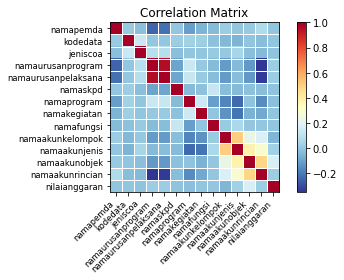

In [29]:
# create correlation matrix
import statsmodels.api as sm

corr = datafix.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

>warning!: variabel indipenden tidak ada yg kuat korelasinya dengan variabel dependen >= model tidak akan terlalu baik memprediksi

>based on correlation we must drop
1. namaurusanpelaksana or namaurusanprogram
2. namaakunjenis or namaakunkelompok
3. namaakunrincian or namaakunobjek

In [30]:
#dataset fix buat modelling
datafix =datafix[['namapemda','namaurusanprogram', 'namaskpd', 'namaprogram', 'namakegiatan', 'namafungsi', 'namaakunkelompok', 'namaakunobjek','nilaianggaran']]

Oke!! lanjut modelling

# Train -Test split

In [31]:
#Variabel Independen
X = datafix.drop(["nilaianggaran"], axis=1)
X.head()

,namapemda,namaurusanprogram,namaskpd,namaprogram,namakegiatan,namafungsi,namaakunkelompok,namaakunobjek
5616564,269,473,336,4722,146348,73,5,177
4845552,318,657,6126,4722,144132,44,5,177
4718499,5,1321,1808,4332,147992,79,2,689
752243,195,1243,1212,2620,190738,5,5,388
1053792,350,1061,104,133,46622,73,30,1840


In [32]:
#Variabel Dependen
y=datafix["nilaianggaran"]
y.head()

5616564     7500000.0
4845552      530000.0
4718499     8639800.0
752243      4000000.0
1053792    22343500.0
Name: nilaianggaran, dtype: float64

In [33]:
#DataTesting dan Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=1234)

In [34]:
print(X_train.shape)
print(X_test.shape)

(761500, 8)
(190375, 8)


<AxesSubplot:>

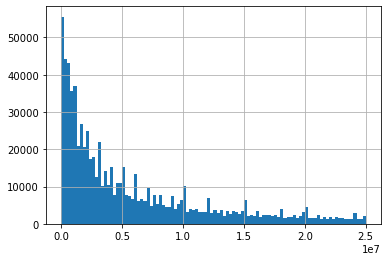

In [35]:
y_train.hist(bins= 100)

<AxesSubplot:>

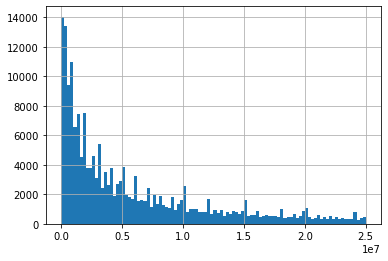

In [36]:
y_test.hist(bins= 100)

distribusi data train dan test mirip, oke bisa lanjut modelling

# Model Selection

Karena semua variabel indipenden kategorik -> tree method would be the best

1. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
from sklearn.metrics import mean_squared_error

predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse 

2056034.6066744514

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [40]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [6945489.21159337 6911456.38404459 6951913.15521347 6948239.19622352
 6953662.26676034]
Mean: 6942152.042767058
Standard deviation: 15608.831922673537


ga bagus, dari range 0-25 juta dapet mean error 6,9 juta

2. Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
  
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [42]:
predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse 

2912386.5969705745

In [44]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [5620590.98645885 5614367.13056378 5622219.60542333 5636101.24317219
 5633769.74786807]
Mean: 5625409.7426972445
Standard deviation: 8240.564775589779


better than DT but only got 5,6 juta rmse, coba hyperparameters tuning buat ningkatin evaluasi

In [45]:
#
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [30, 40, 50], 'max_features': [4, 6, 8]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [30, 40, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
#parameter terbaik -> n_estimators -> 50, coba tambahinlagi
grid_search.best_params_ 

{'max_features': 4, 'n_estimators': 50}

In [47]:
#hasil evaluasi dari parameter teraik
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

5453874.378912701

Random forest dengan hyperparameters menjadi model terbaik, sehingga bisa dilanjutkan untuk evaluasi final dengan test set

<AxesSubplot:ylabel='feature'>

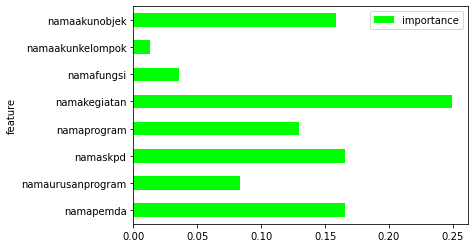

In [48]:
#Cek Feature importances
features = list(X_train.columns)
feature_importances = pd.DataFrame({'feature': features,
'importance': grid_search.best_estimator_.feature_importances_})
feature_importances .plot(x ='feature', y='importance', kind =
'barh', color="lime")

In [49]:
#menggunakan model final untuk uij coba test set
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

5429194.885113691

In [50]:
#Save Model
#import pickle
#pickle.dump(final_model, open('modelapbn.pkl','wb'))